In [1]:
%load_ext autoreload
%autoreload 2

from ltu_ili_testing import SBI_Fitter


grid_path = '/home/tharvey/work/output/output.hdf5'

 Load grid from path. Create default feature array from photometry. This includes all filters, normalized to the MUV, along with redshift.

In [2]:
fitter = SBI_Fitter.init_from_hdf5('test', grid_path)

fitter.create_feature_array_from_raw_photometry();

---------------------------------------------
Features: 195000 features over 22 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 2.509 - 50.000 AB
NIRCam.F090W: 0.134 - 50.000 AB
NIRCam.F115W: -0.780 - 45.186 AB
NIRCam.F140M: -1.636 - 4.073 AB
NIRCam.F150W: -1.658 - 1.029 AB
NIRCam.F162M: -1.634 - 0.661 AB
NIRCam.F182M: -1.953 - 0.867 AB
NIRCam.F200W: -2.388 - 0.986 AB
NIRCam.F210M: -2.665 - 1.088 AB
NIRCam.F250M: -3.182 - 1.412 AB
NIRCam.F277W: -4.038 - 1.556 AB
NIRCam.F300M: -4.458 - 1.682 AB
NIRCam.F335M: -4.644 - 1.906 AB
NIRCam.F356W: -4.690 - 2.006 AB
NIRCam.F360M: -4.687 - 2.048 AB
NIRCam.F410M: -4.810 - 2.278 AB
NIRCam.F430M: -4.826 - 2.373 AB
NIRCam.F444W: -4.852 - 2.413 AB
NIRCam.F460M: -4.876 - 2.539 AB
NIRCam.F480M: -4.920 - 2.608 AB
redshift: 6.000 - 11.000 None
norm_mUV_AB: 23.129 - 43.021 AB
---------------------------------------------
Removing parameter redshift from parameter array and

## Run single SBI model

There are many arguments available here to customize the hyperparameters, model ensemble etc. 

In [6]:
fitter.run_single_sbi(n_nets=2, engine='NPE', stop_after_epochs=20, model_type=['mdn', 'maf'])

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.


Splitting dataset with 195000 samples into training and testing sets with 0.80 train fraction.
[2025-04-26 18:32:27,545] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 Training neural network. Epochs trained: 345

INFO:root:Training model 2 / 2.


 Training neural network. Epochs trained: 312346 epochs.

INFO:root:It took 3350.3742344379425 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/test


 Neural network successfully converged after 313 epochs.

AttributeError: 'SBI_Fitter' object has no attribute '_get_timestamp'

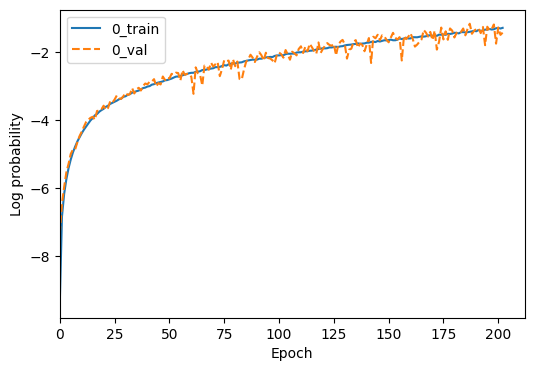

In [39]:
fitter.plot_loss(fitter.stats)

Drawing 737 posterior samples:   0%|          | 0/737 [00:00<?, ?it/s]

Drawing 263 posterior samples:   0%|          | 0/263 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/test/plots/test_114562_plot_single_posterior.jpg...
  0%|          | 0/39000 [00:00<?, ?it/s]WARNING:root:Only 0.773% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    656 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
  0%|          | 15/39000 [00:00<05:22, 120.76it/s]WARNING:root:Only 0.642% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    687 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
                    accepted. It may take a long time to collect the remaining
                    197 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
        

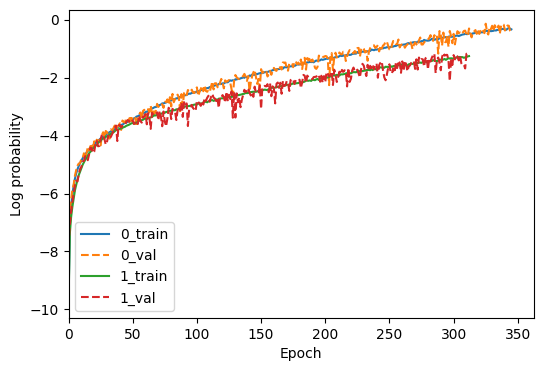

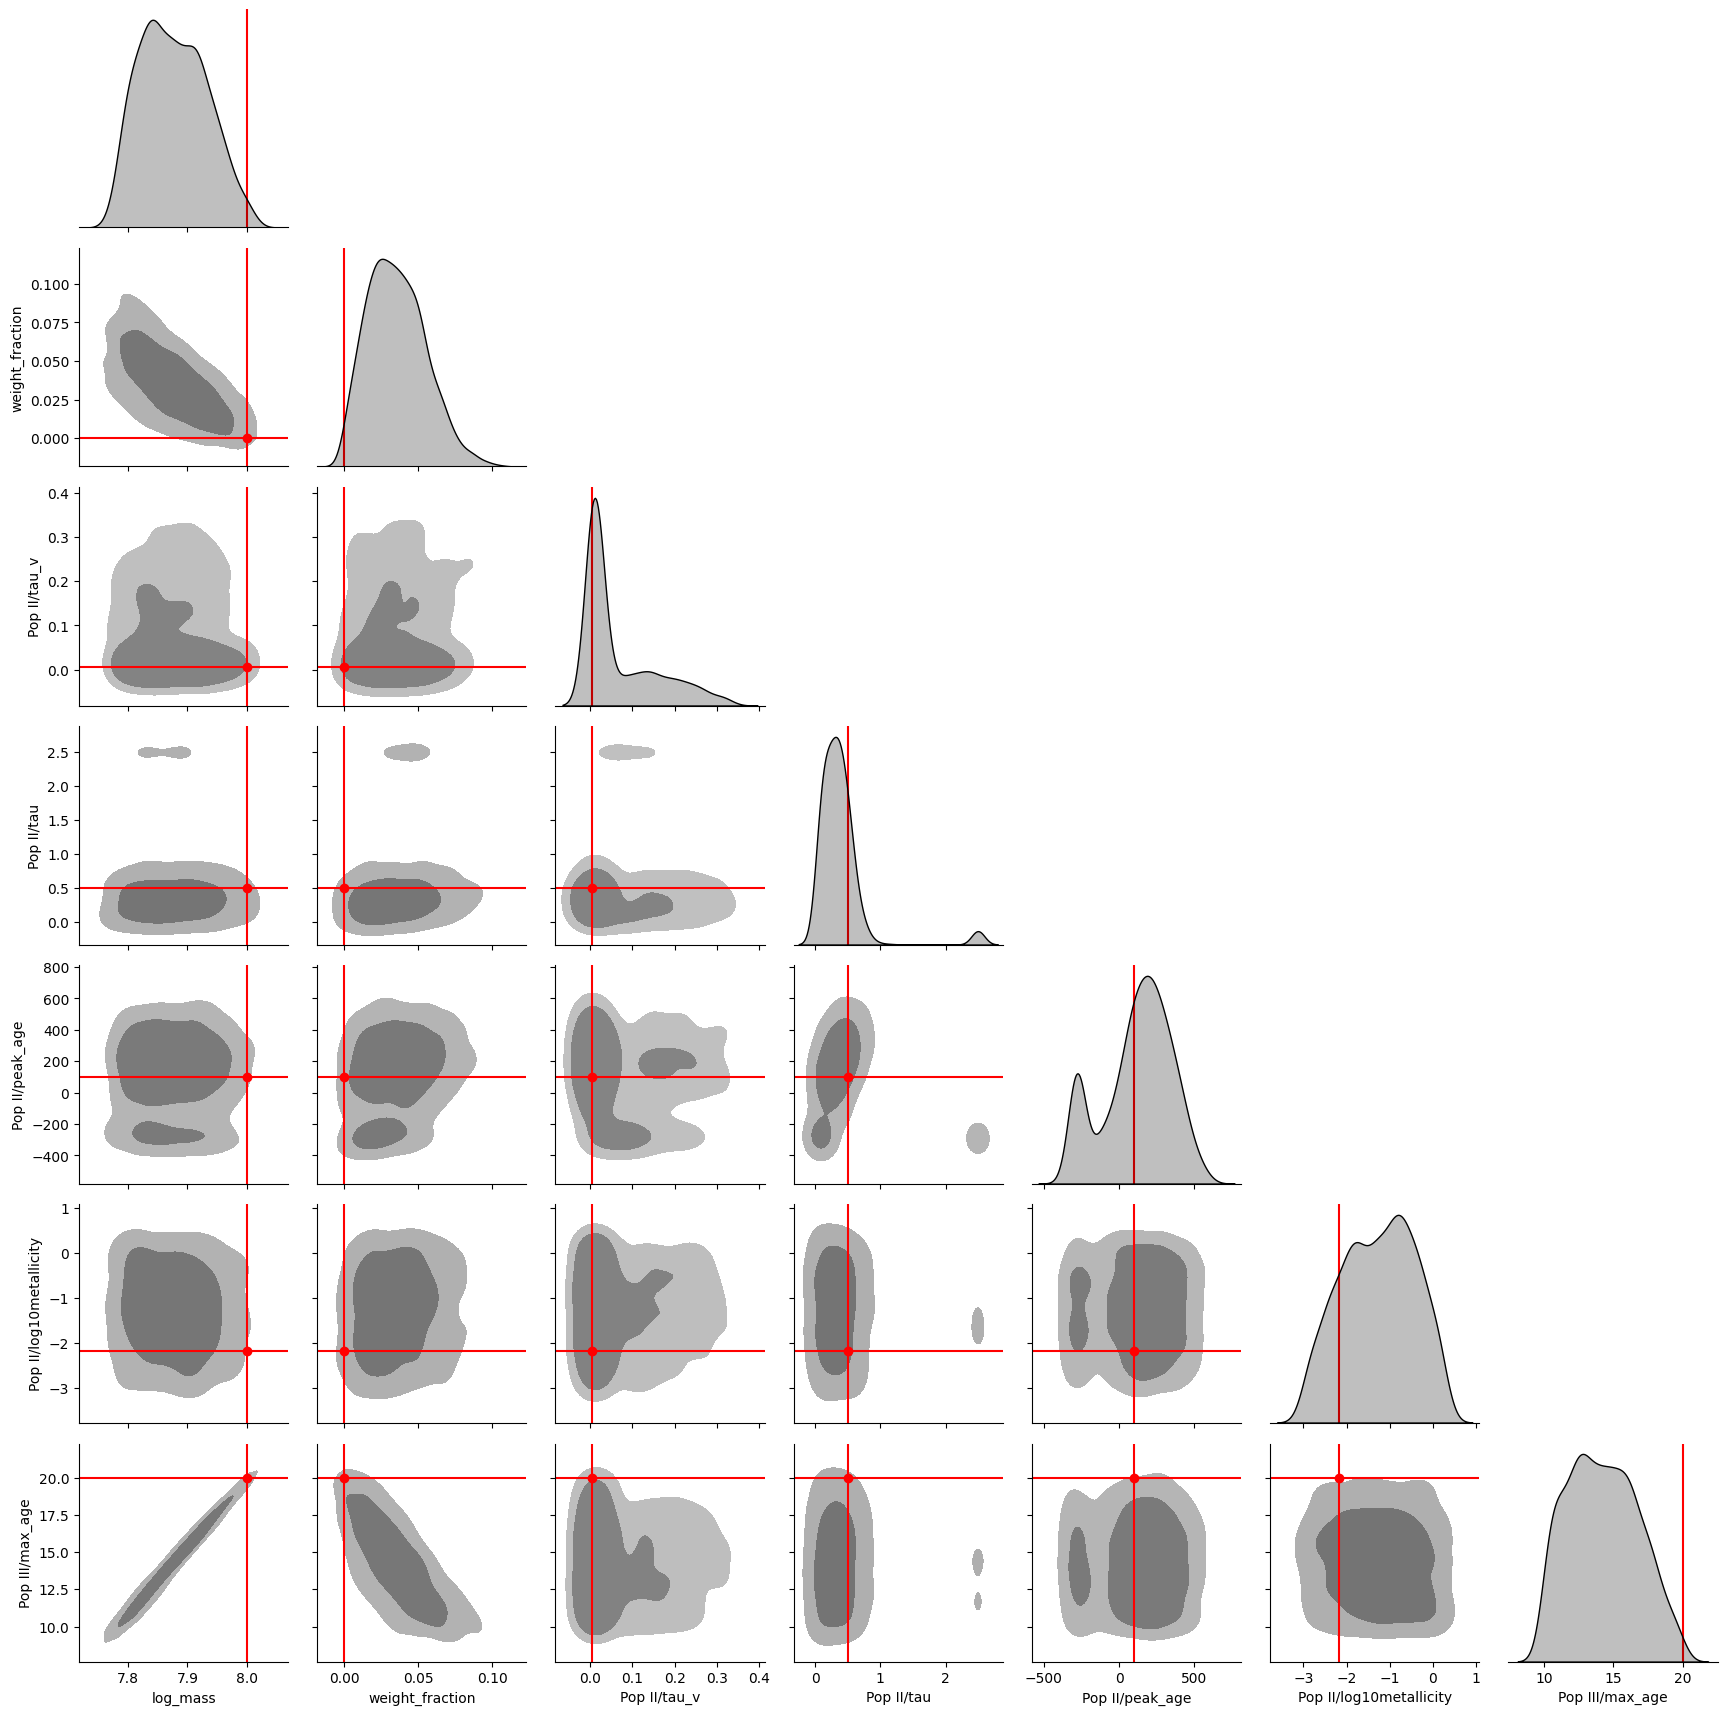

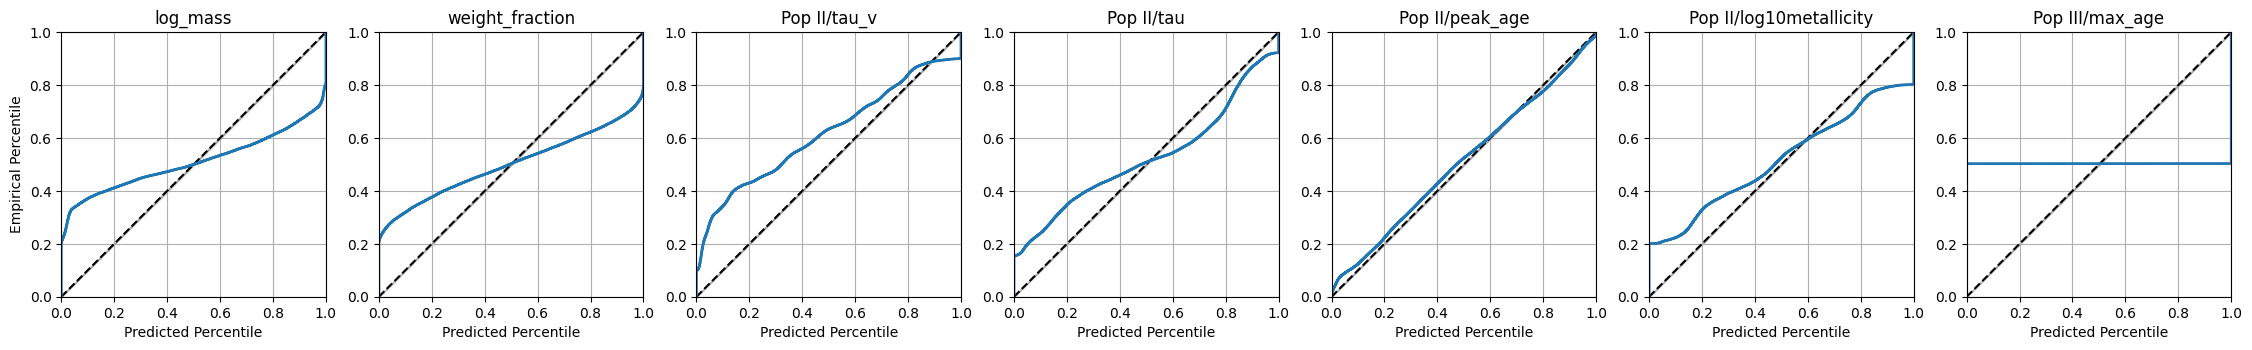

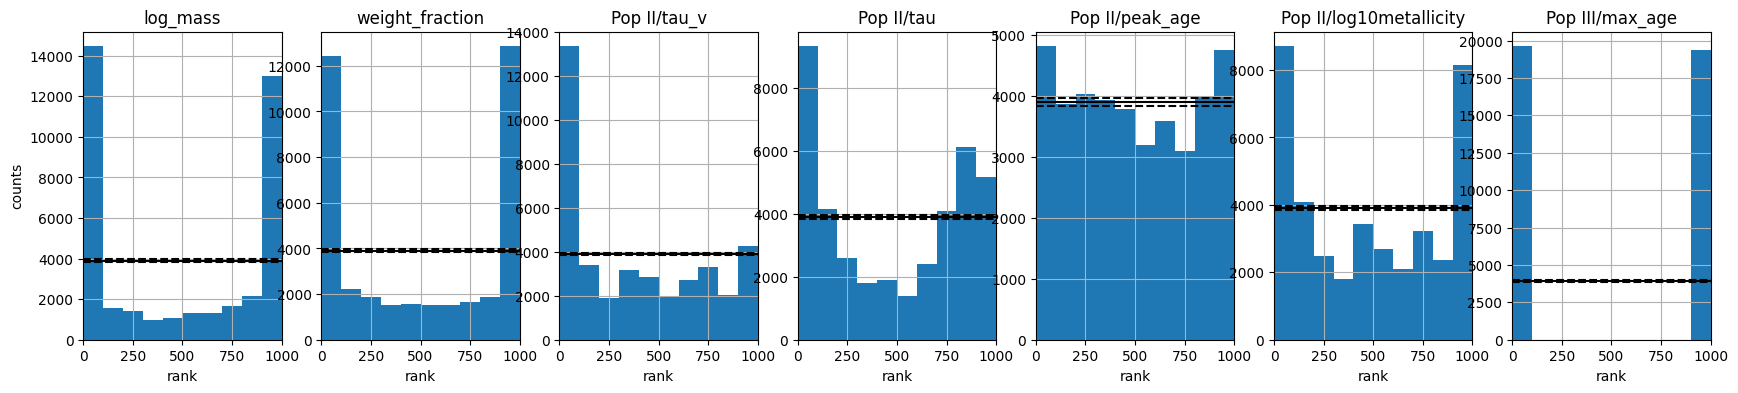

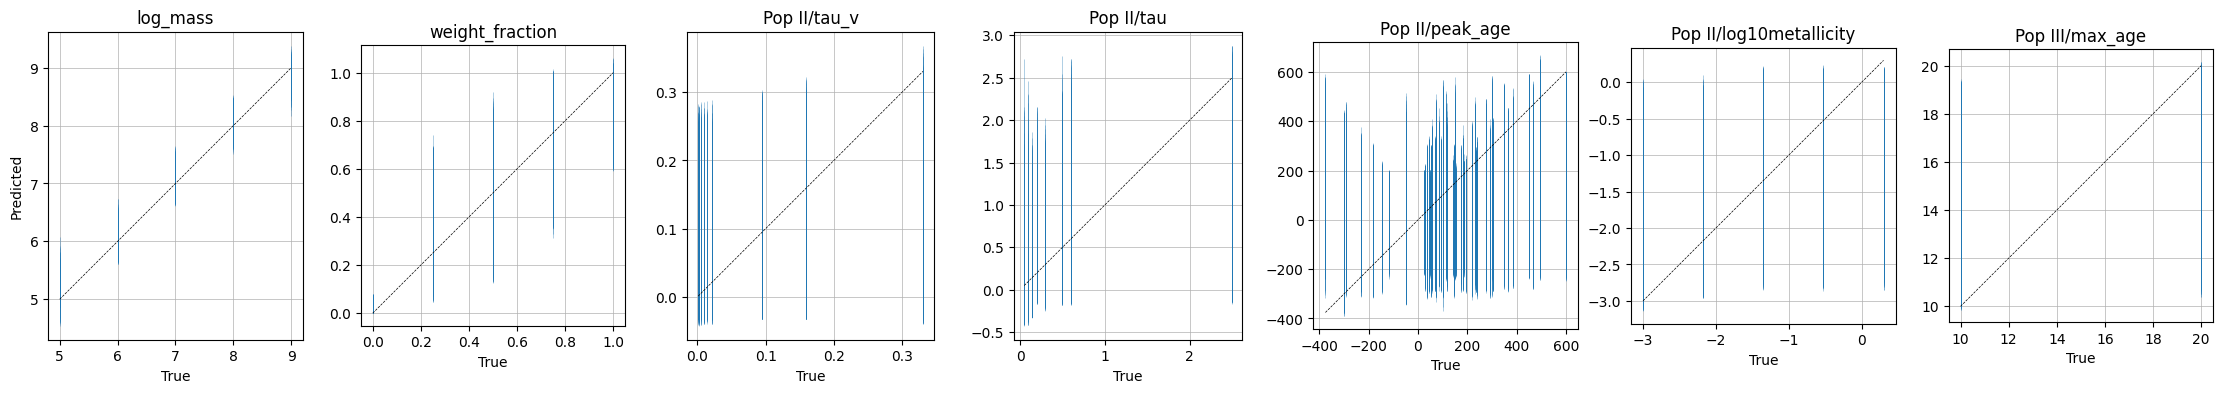

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


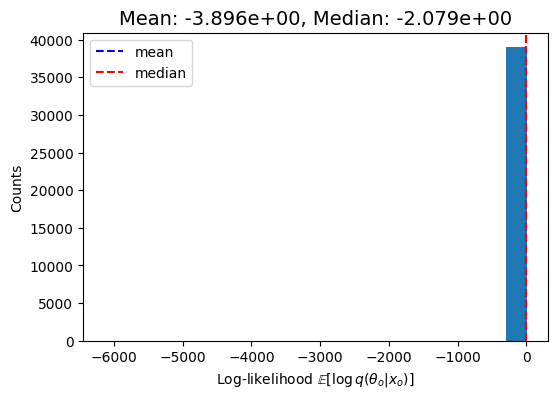

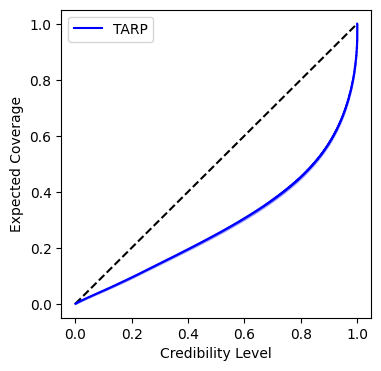

In [8]:
fitter.plot_diagnostics()


You can load a posterior and stats from the saved model pickle. 

In [35]:
posterior, stats = fitter.load_model_from_pkl('/home/tharvey/work/ltu-ili_testing/models/testposterior.pkl');

In [ ]:
test_metrics = fitter._evaluate_model(
                fitter.posteriors, 
                fitter.feature_array[fitter._test_indices], 
                fitter.fitted_parameter_array[fitter._test_indices],
            )

                    accepted. It may take a long time to collect the remaining
                    920 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
                    accepted. It may take a long time to collect the remaining
                    950 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
                    accepted. It may take a long time to collect the remaining
                    980 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
                    accepted. It may take a long time to collect the remaining
                    937 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
                    accepted. It may take a long time to collect the remaining
                    972 s

KeyboardInterrupt: 

In [37]:
fitter.plot_posterior(
    X=fitter.feature_array[fitter._test_indices],
    y=fitter.fitted_parameter_array[fitter._test_indices],
    
)

ValueError: The `x` passed to condition the posterior for evaluation or sampling
                has an inferred batch shape larger than one. This is not supported in
                some sbi methods for reasons depending on the scenario:

                    - in case you want to evaluate or sample conditioned on several iid
                      xs e.g., (p(theta | [x1, x2, x3])), this is fully supported only
                      for likelihood based SNLE and SNRE. For SNPE it is supported only
                      for a fixed number of trials and using an appropriate embedding
                      net, i.e., by treating the trials as additional data dimension. In
                      that case, make sure to pass xo with a leading batch dimensionen.

                    - in case you trained with a single round to do amortized inference
                    and now you want to evaluate or sample a given theta conditioned on
                    several xs, one after the other, e.g, p(theta | x1), p(theta | x2),
                    p(theta| x3): this broadcasting across xs is not supported in sbi.
                    Instead, what you can do it to call posterior.log_prob(theta, xi)
                    multiple times with different xi.

                    - finally, if your observation is multidimensional, e.g., an image,
                    make sure to pass it with a leading batch dimension, e.g., with
                    shape (1, xdim1, xdim2). Beware that the current implementation
                    of sbi might not provide stable support for this and result in
                    shape mismatches.

            NOTE: below we use list notation to reduce clutter, but `x` should be of
            type torch.Tensor or ndarray.

            For example:

            > x_o = [[1]]
            > x_o = [[1, 2, 3]]

            are interpreted as single observations with a leading batch dimension of
            one. However

            > x_o = [ [1], [2] ]
            > x_o = [ [1,2,3], [4,5,6] ]

            are interpreted as a batch of two scalar or vector observations, which
            is not supported yet. The following is interpreted as a matrix-shaped
            observation, e.g. a monochromatic image:

            > x_o = [ [[1,2,3], [4,5,6]] ]

            Finally, for convenience,

            > x_o = [1]
            > x_o = [1, 2, 3]

            will be interpreted as a single scalar or single vector observation
            respectively, without the user needing to wrap or unsqueeze them.
            

In [30]:
fitter.plot_coverage(
    X=fitter.feature_array[fitter._test_indices],
    y=fitter.fitted_parameter_array[fitter._test_indices],
    num_samples=100,
)

  0%|          | 0/39000 [00:00<?, ?it/s]WARNING:root:Only 0.832% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    16 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
  0%|          | 43/39000 [00:00<01:31, 427.90it/s]WARNING:root:Only 0.614% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    38 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
  0%|          | 91/39000 [00:00<01:25, 457.36it/s]WARNING:root:Only 0.139% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    86 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
  0%|          | 137/39000 [00:00<01:29, 434.20it/

KeyboardInterrupt: 

In [9]:
print('hello')
print('world')

hello
world
